A few things to lookup:
* Collaborative Filtering
* Singular Value Decomposition
* Restricted Boltzman Machines
* Cold Start Problem

Problem Netflix came up against:
How should a recommendation system balance making
recommendations that it thinks are good for that person
against exploratory recommendations aimed at discovering
something important about the persons recommendations?

K-Armed Bandit

Epsilon Greedy approach

Laplace Smoothing make an algorithm more robust when train with little data

In [1]:
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/data/vocab2.txt
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/data/cb.txt

--2021-01-25 12:04:53--  https://github.com/mlittmancs/great_courses_ml/raw/master/data/vocab2.txt
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/vocab2.txt [following]
--2021-01-25 12:04:54--  https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/vocab2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.40.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.40.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134845 (132K) [text/plain]
Saving to: ‘vocab2.txt’

vocab2.txt          100%[===================>] 131.68K  --.-KB/s    in 0.08s   

2021-01-25 12:04:54 (1.56 MB/s) - ‘vocab2.txt’ saved [134845/134845]

--2021-01-25 12:04:55--  https://github.com/mlittmancs/great_courses

In [29]:
# read in the vocabulary file
def readvocab():
   # keep track of the number of words
    lexiconsize = 0
   # initialize an empty dictionary
    vocab_dict = {}
   # create a catch-all feature (vector component) for all unknown words
    vocab_dict["@unk"] = lexiconsize
    lexiconsize += 1
   # read in the vocabulary file
    with open("vocab2.txt", "r") as f:
        data = f.readlines()
   # Process the file a line at a time.
    for line in data:
        # The count is the first 3 characters
        count = int(line[0:4])
        # The word is the rest of the string
        token = line[5:-1]
       # Create a feature if it’s appeared at least twice
        if count > 1:
            vocab_dict[token] = lexiconsize
            lexiconsize += 1
    # squirrel away the total size for later reference
    vocab_dict["@size"] = lexiconsize
    return(vocab_dict)

vocab_dict = readvocab()

In [30]:
# Turn string str into a vector.
def tokenize(string, vocab_dict):
  # initially the vector is all zeros
  vec = [0 for i in range(vocab_dict["@size"])]
  # for each word
  for t in string.split(" "):
   # if the word has a feature, add one to the corresponding feature
    if t in vocab_dict: vec[vocab_dict[t]] += 1
   # otherwise, count it as an unk
    else: vec[vocab_dict["@unk"]] += 1
  return(vec)

In [31]:
# read in labeled examples and turn the strings into vectors
def getdat(vocab_dict):
    with open("cb.txt", "r") as f:
        data = f.readlines()
    dat = []
    labs = []
    for line in data:
        labs = labs + [int(line[0])]
        dat = dat + [tokenize(line[2:], vocab_dict)]
    return(dat, labs)

(dat, labs) = getdat(vocab_dict)

In [32]:
import random
from sklearn.naive_bayes import MultinomialNB

def playgame(chooser, rounds, alpha):
  curitem = 0
  score = 0
  trainset = []
  trainlabs = []
  b = 5

  while curitem < rounds:
    chosenitem = chooser(curitem, b, trainset, trainlabs, alpha)
    score = score + labs[chosenitem]
    trainset = trainset + [dat[chosenitem]]
    trainlabs = trainlabs + [labs[chosenitem]]
    curitem += b
  return(score)

In [33]:
def argmax(indices, vals):
 best = max(vals)
 for i in range(len(indices)):
   if vals[i] == best:
     return(indices[i])

In [34]:
def probachooser(curitem, b, trainset, trainlabs, alpha):
  if len(trainset) == 0:
    chosenitem = random.randint(curitem,curitem+b-1)
  else:
    clf = MultinomialNB(alpha=alpha)
    clf = clf.fit(trainset, trainlabs)
    yhat = clf.predict_proba(dat[curitem:(curitem+b)])
    chosenitem = argmax(range(curitem,curitem+b), [p for (c,p) in yhat])

  return(chosenitem)

In [37]:
# alphas = range(10,200,5)
# ress = []
# for alpha in alphas:
#   res = playgame(probachooser, 1000, alpha)
#   ress += [res]

rep = 10
alphas = [0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]
ress = []
mins = []
maxs = []
for alpha in alphas:
  print("Processing " + str(alpha))
  total = 0
  res = []
  for i in range(rep):
    res += [playgame(probachooser, 1000, alpha)]
  ress += [sum(res)/rep]
  mins += [min(res)]
  maxs += [max(res)]

Processing 5e-05
Processing 0.0001
Processing 0.0002
Processing 0.0005
Processing 0.001
Processing 0.002
Processing 0.005
Processing 0.01
Processing 0.02
Processing 0.05
Processing 0.1
Processing 0.2
Processing 0.5
Processing 1.0


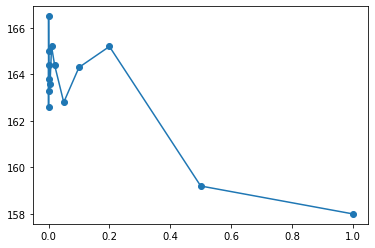

In [38]:
import matplotlib.pyplot as plt

plt.scatter(alphas,ress)
plt.plot(alphas,ress)
plt.show()


DUDE - WHAT IS HAPPENING IN THE VIDEOS?

The code doesn't run half the time and I have to hack it all up. This time it's just way too fucked print(up..)

In [ ]:
grid_square = input_image[X*256:(X+1)*256,Y*256:(Y+1)*256]

rows = input_image.shape[0]/256
cols = input_image.shape[1]/256